# Assignment 2 - Classification

<img src="https://i.imgur.com/7MAAzbN.png" width=600 align="center">

# Contents
1. [Background Information](#1.-Background-Information) <br>
2. [Project Objectives](#2.-Project-Objectives)<br>
3. [Read This First](#3.-Read-This-First) <br>
4. [Data Exploration](#4.-Data-Exploration) <br>
5. [Classification using Random Forest](#5.-Classification-using-Random-Forest) <br> 
a. [Problem 1 (Predicting with insurance profile)](#a.-Problem-1-(Predicting-with-insurance-profile)) <br>
b. [Problem 2 (Predicting with full profile) ](#b.-Problem-2-(Predicting-with-full-profile)) <br>
6. [Recommendations](#6.-Recommendations) <br> 
7. [Key Takeaways](#7.-Key-Takeaways) <br>
8. [Using R in Jupyter Notebook](#8.-Using-R-in-Jupyter-Notebook) 

# 1. Background Information

Suppose you the Data Scientist in a small Car Insurance company, and you want to judge if the Customers will accept or reject a new Insurance product that the company is going to launch. Your company did a pilot with 9000 customers and obtained the corresponding dataset. The classification goal is to learn from this pilot, and predict if a targeted customer will respond Yes to the offer. Your company also wants to identify the top three variables that may affect the response of the customers, and they also want to know how to increase the chances for the customers to respond Yes to the offered Insurance product.

An auto insurance claim is a request made to an insurance company for compensation. Insurance claims cover damages sustained after a car accident or for representation or intervention on the insured's behalf when they are liable for damages.

Data source: https://www.emcien.com/support_subdomain/help/sample-data-sets/

# 2. Project Objectives 

The main goal of this assignment is to write a Consulting Report for your Car Insurance company, so that they can formulate their marketing strategy towards the target demography of potential clients. Your consulting report should be based on your exploratory analysis and classification model.

# 3. Read This First 

It can be quite hard to read code sometimes and to aid you in understanding my code and my thought process, <br> 
I have included my <b>explanation and thought process in <font color=green> green </font></b> and <b>weaved my insights and results in <font color=blue> blue.</font> </font></b> 

If you like to skip to the answers for the questions below, here are the quick links. 
- Identify the top three important variables in this case  + Why are they important? Justify in terms of the Pilot data <br>
[Problem 1](#Top-Variables) [Problem 2](#Top-Variables.) <br>
- How would you influence 'Response' using these variables? <br>
[Problem 1 & 2](#6.-Recommendations)

### Importing libraries

In [1]:
options(warn=-1)

In [2]:
library(corrplot)
library(rsample)
library(caret)
library(Hmisc)
library(randomForest)
library(dplyr)

corrplot 0.84 loaded
Loading required package: tidyr
Loading required package: lattice
Loading required package: ggplot2
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin


Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## [Back to top](#Contents) 

# 4. Data Exploration

<font color=green> We first load the data and observe the structure of the datasets we are provided. ```describe()``` is used in this case as it offers a more comprehensive view of dataset that has plenty of categorical variables. 

In [3]:
market_training_data <- read.csv("assign2_MarketData.csv", header = TRUE)
describe(market_training_data)
market_test_data <- read.csv("assign2_MarketPred.csv", header = TRUE)

market_training_data 

 24  Variables      9000  Observations
--------------------------------------------------------------------------------
Customer 
       n  missing distinct 
    9000        0     9000 

lowest : AA10041 AA11235 AA16582 AA30683 AA34092
highest: ZZ77357 ZZ83340 ZZ89380 ZZ91716 ZZ97035
--------------------------------------------------------------------------------
State 
       n  missing distinct 
    9000        0        5 

lowest : Arizona    California Nevada     Oregon     Washington
highest: Arizona    California Nevada     Oregon     Washington
                                                                 
Value         Arizona California     Nevada     Oregon Washington
Frequency        1679       3100        871       2567        783
Proportion      0.187      0.344      0.097      0.285      0.087
--------------------------------------------------------------------------------
Customer.Lifetime.Value 
       n  missing distinct     Info     Mean     

<font color=blue> We can make a few observations here. 
1. The training data has 24 variables with 9000 observations. 
2. The Customer variable is entirely distinct with 9000 unique values. This means that it won't be useful in classification later. 
3. There are a total of 5 states. This dataset originated in US.  
4. There are a total of 59 unique dates for the variable Effective.To.Date, starting from 1st Jan 2011 to 2nd Sep 2011. 
5. There are 9 different insurance products. 
6. There are 3 types of policies that the customer can buy (Corporate, Personal or Special) with 3 different level types. Over 50% of customers chose Personal L2/L3. 
7. The most frequent channel of sales is Agent, followed by Branch, Call Center then Web. 
8. There are no missing values in this dataset.
9. There is an equal proportion of male and female customers sampled. 
10. Out of the 9000 people sampled, only 14.3% said Yes to the offered insurance product.

<font color=green>We remove the variable Customer as it is unnecessary for predicting the response variable

In [4]:
dim(market_training_data)
market_training_data <- select(market_training_data, -Customer)
dim(market_training_data)

[1] 9000   24

[1] 9000   23

<font color=green>Next, let us observe the numeric variables of the dataset on a correlation matrix. 

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
Customer.Lifetime.Value,1.00000000,0.025122851,0.394576515,0.011499355,0.010561287,-0.039026205,0.021823754,0.226040254
Income,0.02512285,1.000000000,-0.015887195,-0.027464761,-0.003220953,0.006530458,-0.008961777,-0.354814172
Monthly.Premium.Auto,0.39457652,-0.015887195,1.000000000,0.005051639,0.021111892,-0.012933766,-0.012283324,0.632175936
Months.Since.Last.Claim,0.01149936,-0.027464761,0.005051639,1.000000000,-0.044641486,0.004336209,0.007977099,0.007919425
Months.Since.Policy.Inception,0.01056129,-0.003220953,0.021111892,-0.044641486,1.000000000,-0.002741345,-0.014142451,0.004299913
Number.of.Open.Complaints,-0.03902620,0.006530458,-0.012933766,0.004336209,-0.002741345,1.000000000,0.002274590,-0.013314362
Number.of.Policies,0.02182375,-0.008961777,-0.012283324,0.007977099,-0.014142451,0.002274590,1.000000000,-0.003773249
Total.Claim.Amount,0.22604025,-0.354814172,0.632175936,0.007919425,0.004299913,-0.013314362,-0.003773249,1.000000000


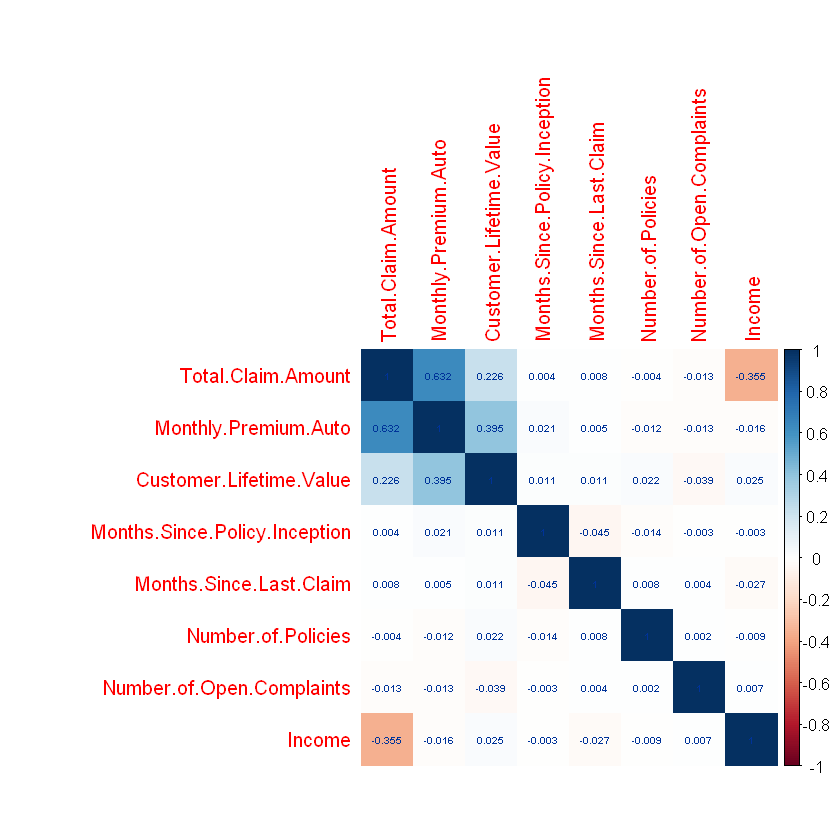

In [5]:
# Separate the numeric variables from the main dataframe
numeric <- unlist(lapply(market_training_data, is.numeric)) 
numeric_data <- market_training_data[ , numeric]
# Plot correlation matrix
cor(numeric_data)
corrplot(cor(numeric_data), method="color", addCoef.col="#003399",number.digits = 3 , number.cex=0.5, order = "FPC")

<font color=blue>Above, we can observe that there is a good correlation between total claim amount and monthly premium. We can plot the graph next. Also, most variables have no correlation to each other. 

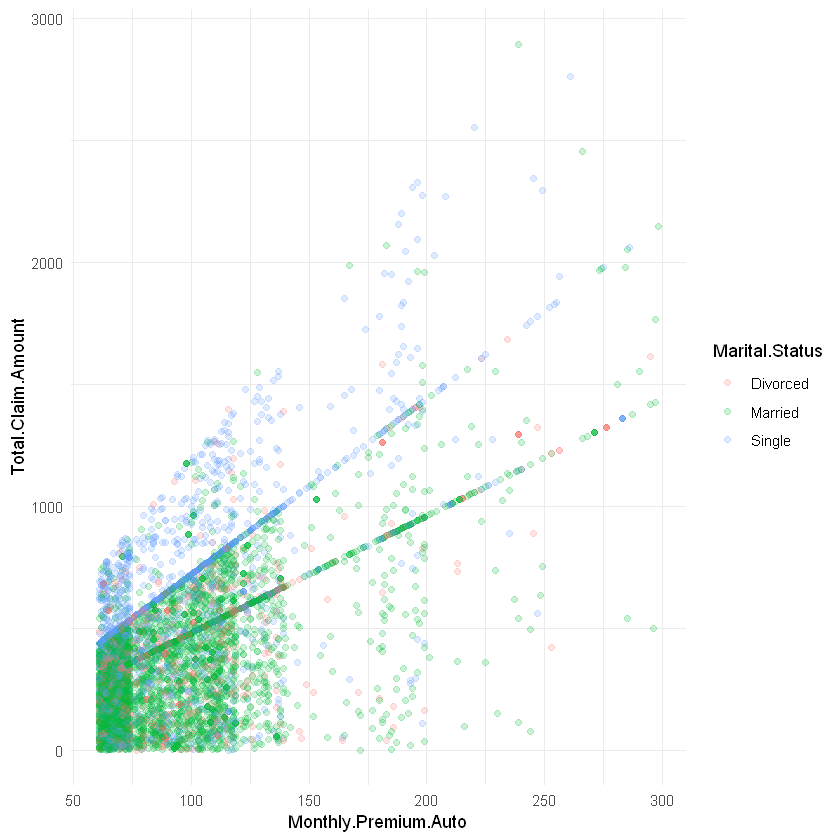

In [6]:
ggplot(data=market_training_data, aes(x=Monthly.Premium.Auto, y=Total.Claim.Amount)) + 
    geom_point(aes(color=Marital.Status), alpha = 0.2) + 
    theme_minimal() 

<font color=blue>From the above, we can infer that single drivers are more likely to make a larger claim amount than married drivers. This also means that singles have a higher probability of getting into an accident.

<font color=green>We split the training data into Demographic Profile and Insurance Profile. Demographic profile has to do with the personal details of the customer such as education, gender, income, maritial status while insurance profile is everything else.  

#### Insurance profile

In [7]:
i_profile <- select(market_training_data, -c(1,4,6,7,8,9,10))
names(i_profile)
dim(i_profile)

[1] "Customer.Lifetime.Value"       "Coverage"                     
 [3] "Effective.To.Date"             "Monthly.Premium.Auto"         
 [5] "Months.Since.Last.Claim"       "Months.Since.Policy.Inception"
 [7] "Number.of.Open.Complaints"     "Number.of.Policies"           
 [9] "Policy.Type"                   "Policy"                       
[11] "Renew.Offer.Type"              "Sales.Channel"                
[13] "Total.Claim.Amount"            "Vehicle.Class"                
[15] "Vehicle.Size"                  "Response"

[1] 9000   16

#### Demographic profile

In [8]:
d_profile <- select(market_training_data, -c(2,3,5,11,12,13,14,15,16,17,18,19,20,21,22))
names(d_profile)

[1] "State"            "Education"        "EmploymentStatus" "Gender"          
[5] "Income"           "Location.Code"    "Marital.Status"   "Response"

<font color=green>We plot the response variable using a bar graph.

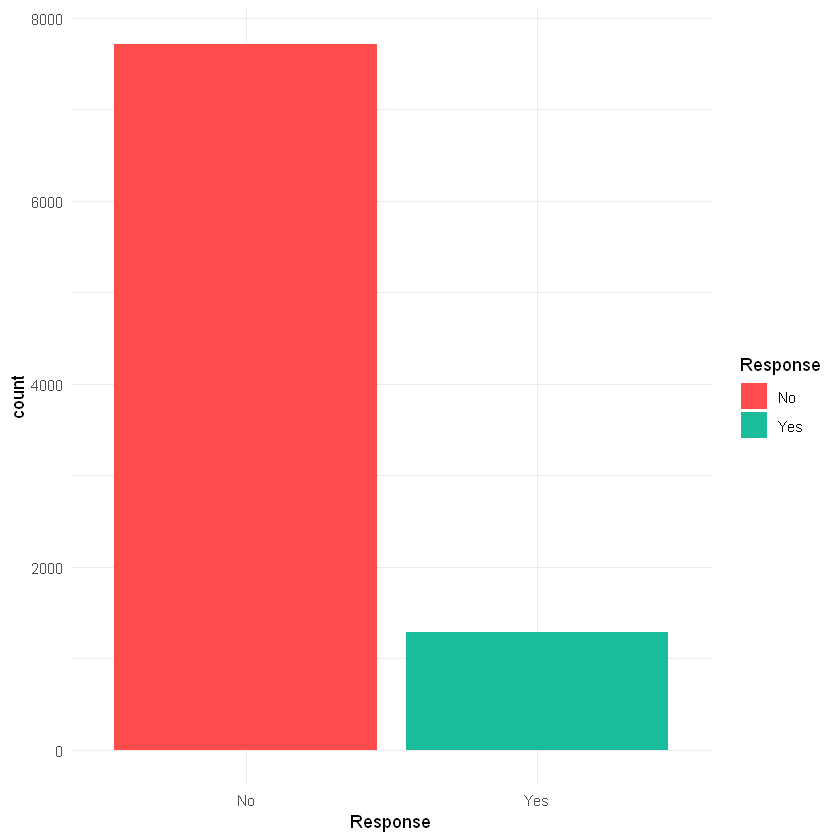

In [9]:
ggplot(data=market_training_data, aes(x=Response, fill=Response)) + geom_bar() +
    theme_minimal() + 
    scale_fill_manual(values=c("#ff4d4d", "#1ABC9C"))

<font color=blue>As mentioned earlier, only 14.3% of the respondents indicated Yes as their response. The unbalanced proportion of target response will generate an inaccurate result for some models. This is because model accuracy makes no clear distinction between false positives and false negative errors. Therefore, there will be a <b>need to resample the response variable.</b>

### Resampling of Response Variable

In [10]:
# library(ROSE)
# library(DMwR)

<font color=green>After some testing of the sampling methods that will generate the best accuracy and precision, the conclusion is that upsampling generates the best model for random forests followed closely by downsampling > ROSE > SMOTE. All sampling methods hovered around a 92-96% accuracy which is by far already an excellent result. <br>

I also attempted to change the seed to test if the randomness of the data could affect the results. The impact on the accuracy is minimal with +- 1% accuracy difference.  

In [11]:
# set.seed(555)
# resampled <- SMOTE(Response ~ ., data  = i_profile)                         
# table(smote_train_V1$Response) 

# set.seed(555)
# resampled <- ROSE(Response ~ ., data  = i_profile)$data                        
# table(smote_train_V1$Response) 

# set.seed(555)                     
# resampled <- downSample(x = i_profile[, -ncol(i_profile)],
#                          y = i_profile$Response)

set.seed(555)                     
resampled <- upSample(x = i_profile[, -ncol(i_profile)],
                         y = i_profile$Response, yname="Response")

<font color=green>When attempting to use a random forest model, R is not able to handle categorical predictors with more than 53 categories. When attempting to do so, it will return the error: <br> "Error in randomForest.default(x, y, mtry = mtryStart, ntree = ntreeTry, : Can not handle categorical predictors with more than 53 categories."

<font color=green>Therefore, there is a need to convert variables with factors into its numerical format. I chose Effective.To.Date as it has 59 levels. 

In [12]:
resampled$Effective.To.Date <- as.numeric(resampled$Effective.To.Date)
str(resampled)

'data.frame':	15426 obs. of  16 variables:
 $ Customer.Lifetime.Value      : num  24179 5462 4890 7433 2237 ...
 $ Coverage                     : Factor w/ 3 levels "Basic","Extended",..: 2 1 1 1 1 1 1 2 1 1 ...
 $ Effective.To.Date            : num  18 29 57 7 54 31 30 31 23 33 ...
 $ Monthly.Premium.Auto         : int  201 69 62 65 61 62 107 83 101 116 ...
 $ Months.Since.Last.Claim      : int  29 23 15 4 19 4 22 10 10 12 ...
 $ Months.Since.Policy.Inception: int  67 0 0 65 44 64 96 12 48 76 ...
 $ Number.of.Open.Complaints    : int  0 0 0 3 0 0 0 1 0 1 ...
 $ Number.of.Policies           : int  2 3 5 2 1 1 4 8 2 2 ...
 $ Policy.Type                  : Factor w/ 3 levels "Corporate Auto",..: 2 2 2 2 2 2 2 3 2 2 ...
 $ Policy                       : Factor w/ 9 levels "Corporate L1",..: 6 6 5 6 5 6 5 9 6 6 ...
 $ Renew.Offer.Type             : Factor w/ 4 levels "Offer1","Offer2",..: 1 2 1 1 3 1 4 2 1 1 ...
 $ Sales.Channel                : Factor w/ 4 levels "Agent","Branch",..: 2 1 

In [13]:
resampled %>% count(Response)

Response,n
No,7713
Yes,7713


## [Back to top](#Contents) 

# 5. Classification using Random Forest 

## a. Problem 1 (Predicting with insurance profile)

### Validating the accuracy of the model

<font color=green>As ```assign2_MarketPred.csv``` does not have a response variable, we split the training data provided to test the accuracy of the model.

In [14]:
# Randomize data set
set.seed(70)
rows <- sample(nrow(resampled))
resampled <- resampled[rows, ]

# We determine the row to split on and create the train and validation set 
split <- round(nrow(resampled) * 0.80)
train_data <- resampled[1:split,]  
validation_data <- resampled[(split + 1):nrow(resampled),]

# Confirm that data is split 8:2
nrow(train_data)
nrow(validation_data)

[1] 12341

[1] 3085

<font color=green>After some testing, we can determine that the best mtry value is 4 and having more number of trees does not cause any harm but can be computationally expensive 

In [16]:
model <- randomForest(Response~.,  
                   ntree = 1000,
                   importance = TRUE,
                   mtry = 4,
                   
                   data = train_data)
model


Call:
 randomForest(formula = Response ~ ., data = train_data, ntree = 1000,      importance = TRUE, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0.06%
Confusion matrix:
      No  Yes class.error
No  6143    7 0.001138211
Yes    0 6191 0.000000000

<font color=blue>From the above, we can gather that the OOB estimate of error rate is extremely low at 0.06%. This percentage error is quite effective in estimating the error in the testing set and does not require further cross validation.

<font color=green>Predict new values in validation dataset and display results.

In [20]:
predData <- predict(model, validation_data, type = "class")
summary(predData)

No  Yes 
1562 1523

<font color=green>Churn statistics based on validation and predicted data

In [22]:
rf.perf <- table(validation_data$Response, predData, dnn=c("Actual", "Predicted"))
confusionMatrix(rf.perf)

Confusion Matrix and Statistics

      Predicted
Actual   No  Yes
   No  1562    1
   Yes    0 1522
                                     
               Accuracy : 0.9997     
                 95% CI : (0.9982, 1)
    No Information Rate : 0.5063     
    P-Value [Acc > NIR] : <2e-16     
                                     
                  Kappa : 0.9994     
                                     
 Mcnemar's Test P-Value : 1          
                                     
            Sensitivity : 1.0000     
            Specificity : 0.9993     
         Pos Pred Value : 0.9994     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5063     
         Detection Rate : 0.5063     
   Detection Prevalence : 0.5066     
      Balanced Accuracy : 0.9997     
                                     
       'Positive' Class : No         
                                     

<font color=blue>The accuracy of the model is 99%, with a sensitivity of 100%. 

### Predicting test set

<font color=green>The next step is to rebuild the model with the validation data.

In [17]:
model_new <- randomForest(Response~.,  
                   ntree = 1000,
                   importance = TRUE,
                   mtry = 4,
                   
                   data = resampled)
model_new


Call:
 randomForest(formula = Response ~ ., data = resampled, ntree = 1000,      importance = TRUE, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0.03%
Confusion matrix:
      No  Yes  class.error
No  7708    5 0.0006482562
Yes    0 7713 0.0000000000

<font color=green> The discrepancy in the levels of the variables between the test set and training set prevents R from predicting new values. Therefore, there is a need to make both sets have the same levels which is what we will be doing below.

<font color=green>Difference in the number of variables and levels

In [20]:
names(market_test_data)
names(resampled)
n_distinct(names(market_test_data))
n_distinct(names(resampled)) 

[1] "Customer"                      "State"                        
 [3] "Customer.Lifetime.Value"       "Coverage"                     
 [5] "Education"                     "Effective.To.Date"            
 [7] "EmploymentStatus"              "Gender"                       
 [9] "Income"                        "Location.Code"                
[11] "Marital.Status"                "Monthly.Premium.Auto"         
[13] "Months.Since.Last.Claim"       "Months.Since.Policy.Inception"
[15] "Number.of.Open.Complaints"     "Number.of.Policies"           
[17] "Policy.Type"                   "Policy"                       
[19] "Renew.Offer.Type"              "Sales.Channel"                
[21] "Total.Claim.Amount"            "Vehicle.Class"                
[23] "Vehicle.Size"

[1] "Customer.Lifetime.Value"       "Coverage"                     
 [3] "Effective.To.Date"             "Monthly.Premium.Auto"         
 [5] "Months.Since.Last.Claim"       "Months.Since.Policy.Inception"
 [7] "Number.of.Open.Complaints"     "Number.of.Policies"           
 [9] "Policy.Type"                   "Policy"                       
[11] "Renew.Offer.Type"              "Sales.Channel"                
[13] "Total.Claim.Amount"            "Vehicle.Class"                
[15] "Vehicle.Size"                  "Response"

[1] 23

[1] 16

In [21]:
levels(market_test_data$Customer.Lifetime.Value) <- levels(train_data$Customer.Lifetime.Value)
levels(market_test_data$Coverage) <- levels(train_data$Coverage)

levels(market_test_data$Monthly.Premium.Auto) <- levels(train_data$Monthly.Premium.Auto)
market_test_data$Effective.To.Date <- as.numeric(market_test_data$Effective.To.Date)
levels(market_test_data$Effective.To.Date) <- levels(train_data$Effective.To.Date)

levels(market_test_data$Months.Since.Last.Claim) <- levels(train_data$Months.Since.Last.Claim)
levels(market_test_data$Months.Since.Policy.Inception) <- levels(train_data$Months.Since.Policy.Inception)
levels(market_test_data$Number.of.Open.Complaints) <- levels(train_data$Number.of.Open.Complaints)

levels(market_test_data$Number.of.Policies) <- levels(train_data$Number.of.Policies)
levels(market_test_data$Policy.Type) <- levels(train_data$Policy.Type)
levels(market_test_data$Policy) <- levels(train_data$Policy)
levels(market_test_data$Renew.Offer.Type) <- levels(train_data$Renew.Offer.Type)
levels(market_test_data$Sales.Channel) <- levels(train_data$Sales.Channel)
levels(market_test_data$Total.Claim.Amount) <- levels(train_data$Total.Claim.Amount)
levels(market_test_data$Vehicle.Class) <- levels(train_data$Vehicle.Class)
levels(market_test_data$Vehicle.Size) <- levels(train_data$Vehicle.Size)

<font color=green>Predict new values found in ```assign2_MarketPred.csv```

In [22]:
# Upsampling with full data
predData <- predict(model_new, market_test_data, type = "class")
summary(predData)

No Yes 
 81  19

<font color=blue>19 customers responded Yes. We can target these customers. 

In [23]:
solution_1 <- data.frame(predData)
write.csv(solution_1, "C:/Users/delim/Desktop/Data Science for Biz/Assignment 2/soln_1.csv", row.names = FALSE)

### Top Variables

<font color=green> We call the ```importance()``` function to check how the attributes used as predictors affect our models.

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Customer.Lifetime.Value,11.56650388,147.00816,146.24596,748.928625
Coverage,-1.42409202,71.02874,71.02452,119.947648
Effective.To.Date,5.58046734,111.26712,110.59760,601.396638
Monthly.Premium.Auto,-0.03986741,147.21297,148.02710,564.704948
Months.Since.Last.Claim,1.08409032,144.26476,143.08447,543.654777
Months.Since.Policy.Inception,6.44131018,164.90742,163.96161,678.782368
Number.of.Open.Complaints,3.75335711,66.84393,66.62848,134.878615
Number.of.Policies,7.61154821,70.21374,70.24389,234.908731
Policy.Type,1.70924086,28.63954,27.90439,8.538768
Policy,-0.64542150,74.45557,72.08290,72.671750


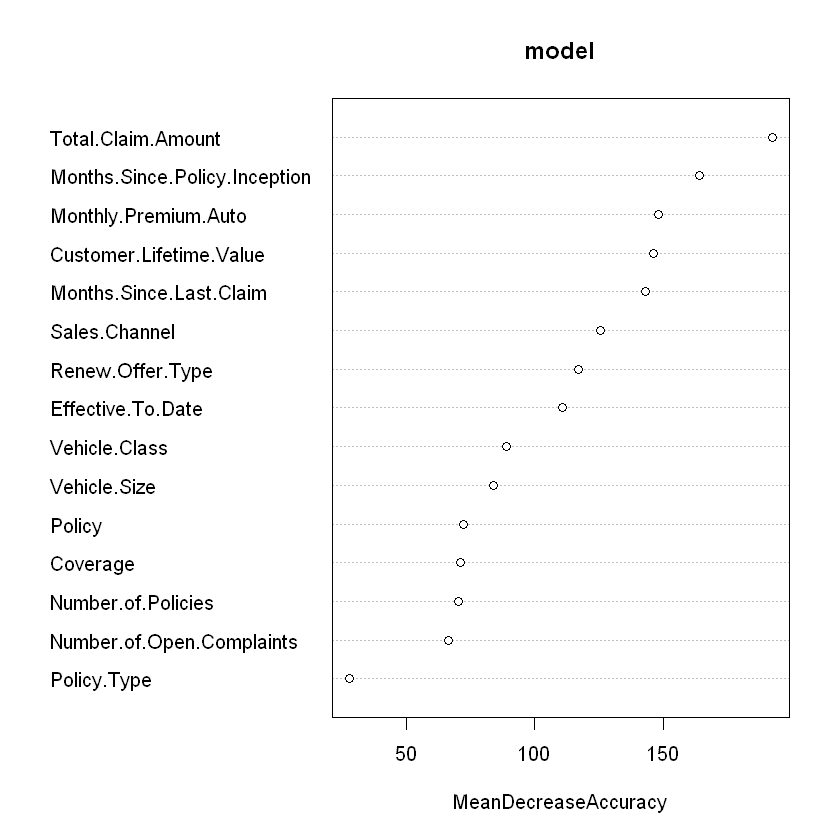

In [24]:
importance(model)        
varImpPlot(model, type=1)

<font color=blue>From the above and below plot, we can discern that Total Claim Amount, months since policy inception and monthly premium are the most important variables. They are the most important as removing these variables results in a large decrease in model accuracy. As such, these factors should be taken into account when deciding the tendency of a customer accepting an insurance policy.

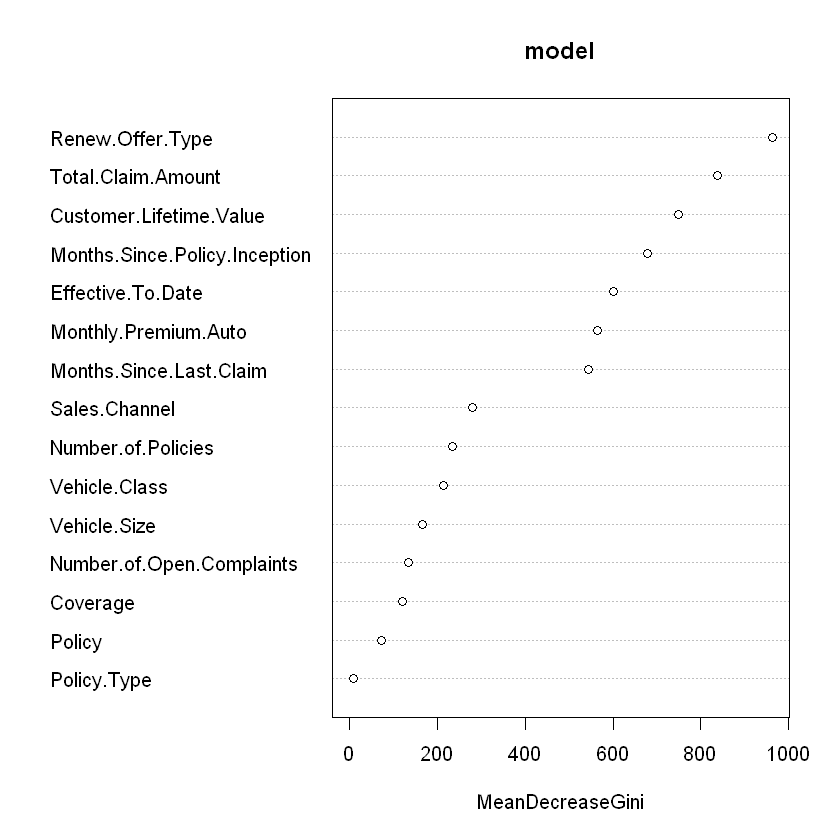

In [25]:
varImpPlot(model, type=2)

In [67]:
# ROSE
# predData <- predict(model, market_test_data, type = "class")
# summary(predData)

No Yes 
 70  30

## [Back to top](#3.-Read-This-First) 

## b. Problem 2 (Predicting with full profile) 

<font color=green>For Problem 2, we perform the same steps as we did in problem 1 but this time, we used the <b>random oversampling method (ROSE)</b> to sample the data. With more variables(22) to include, it should be good enough to generate a high accuracy with minimal misclassification. 

In [27]:
library(ROSE)

Loaded ROSE 0.0-3



In [28]:
set.seed(555)
ROSE_train_V1 <- ROSE(Response ~ ., data  = market_training_data)$data                        
table(ROSE_train_V1$Response) 


  No  Yes 
4451 4549 

In [29]:
ROSE_train_V1$Effective.To.Date <- as.numeric(ROSE_train_V1$Effective.To.Date)
str(ROSE_train_V1)

'data.frame':	9000 obs. of  23 variables:
 $ State                        : Factor w/ 5 levels "Arizona","California",..: 1 1 4 2 2 1 4 4 4 2 ...
 $ Customer.Lifetime.Value      : num  3513 12005 1930 10496 11477 ...
 $ Coverage                     : Factor w/ 3 levels "Basic","Extended",..: 1 1 3 1 3 1 1 1 1 1 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 2 2 2 2 4 2 4 1 2 4 ...
 $ Effective.To.Date            : num  49 23 37 37 15 9 38 57 34 16 ...
 $ EmploymentStatus             : Factor w/ 5 levels "Disabled","Employed",..: 5 2 5 4 5 5 5 5 1 5 ...
 $ Gender                       : Factor w/ 2 levels "F","M": 2 2 2 1 2 2 2 2 2 1 ...
 $ Income                       : num  -9764 109399 5264 34193 7406 ...
 $ Location.Code                : Factor w/ 3 levels "Rural","Suburban",..: 2 2 2 2 2 2 2 2 3 2 ...
 $ Marital.Status               : Factor w/ 3 levels "Divorced","Married",..: 3 2 2 1 3 2 2 2 2 2 ...
 $ Monthly.Premium.Auto         : num  65.4 11

<font color=green>After some testing, 5 is the best mtry. We stick to ntrees = 1000. 

In [30]:
model_2 <- randomForest(Response~.,  
                   ntree = 1000,
                   importance = TRUE,
                   mtry = 5,
                   
                   data = ROSE_train_V1)
model_2


Call:
 randomForest(formula = Response ~ ., data = ROSE_train_V1, ntree = 1000,      importance = TRUE, mtry = 5) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 5

        OOB estimate of  error rate: 1.43%
Confusion matrix:
      No  Yes  class.error
No  4324  127 0.0285329140
Yes    2 4547 0.0004396571

In [65]:
predData <- predict(model_2, market_test_data, type = "class")
summary(predData)

No Yes 
 79  21

<font color=blue>The results are similar in using just the insurance profile or all the variables. 

In [66]:
solution_2 <- data.frame(predData)
write.csv(solution_2, "C:/Users/delim/Desktop/Data Science for Biz/Assignment 2/soln_2.csv", row.names = FALSE)

### Top Variables.

<font color=green>Which are the top 3 most important variables in this case? 

<font color=green> We call the ```importance()``` function to check how the attributes used as predictors affect our models.

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
State,23.44296,60.66719,60.57145,84.88004
Customer.Lifetime.Value,17.99663,79.54173,76.45452,182.02922
Coverage,24.75982,74.42093,75.25455,119.30013
Education,36.83118,108.28910,109.91748,260.10205
Effective.To.Date,40.50952,95.88091,94.91820,453.75654
EmploymentStatus,61.69113,117.59139,119.69443,349.43279
Gender,15.14231,56.05071,55.64598,68.85698
Income,22.61865,79.88830,74.17794,202.51312
Location.Code,48.31841,86.15959,89.62315,160.11451
Marital.Status,57.76721,77.92588,82.72664,168.90450


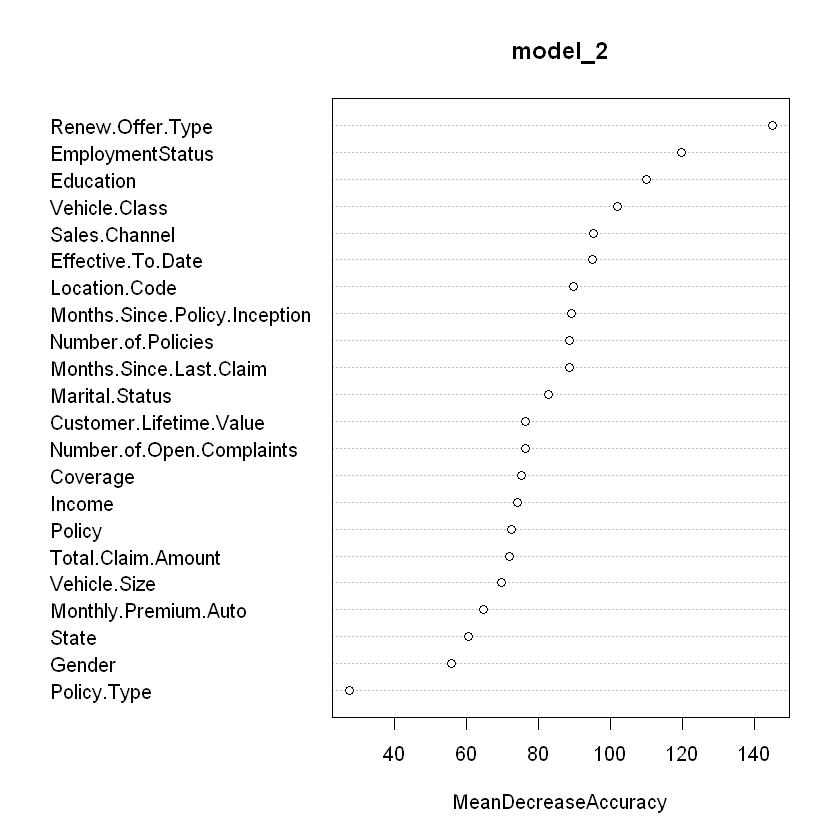

In [35]:
importance(model_2)        
varImpPlot(model_2, type=1)

<font color=blue>From the above and below display, there is a noticeable change in most important variables from just using the insurance profile. We can arrive on the conclusion that renew offer type, employment status and education are the most important predictors. Out of the 3 factors, employment status and education are demographic factors. They are the most important as removing these variables results in a large decrease in model accuracy. As such, these factors should be taken into account when deciding the tendency of a customer accepting an insurance policy. To take it a further step, let's plot the graph to find out under what conditions are needed for the top 3 predictors.  

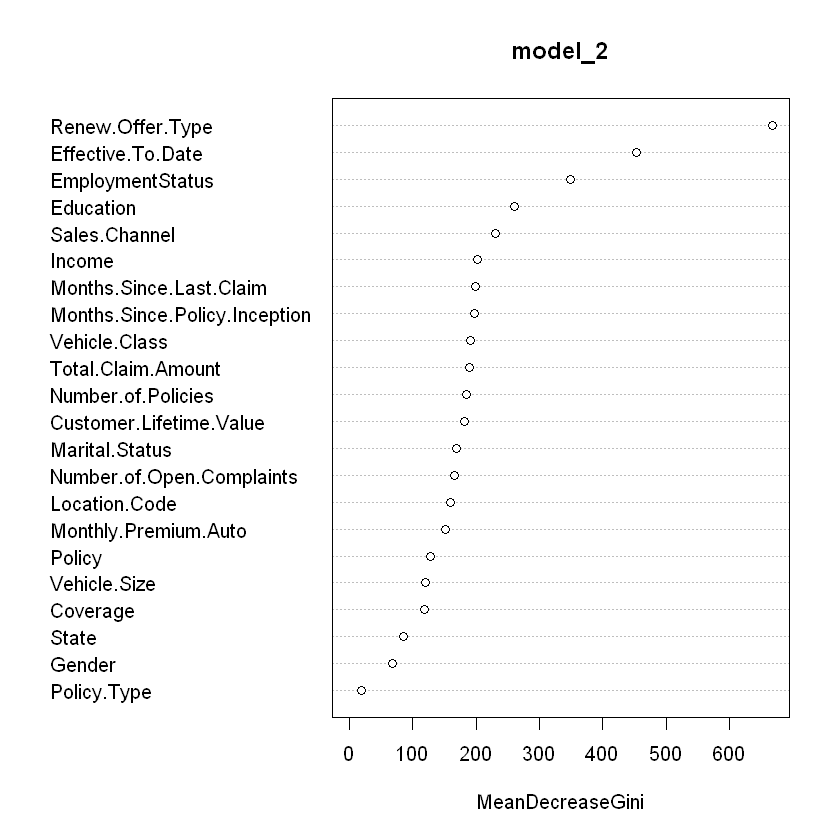

In [36]:
varImpPlot(model_2, type=2)

## [Back to top](#3.-Read-This-First) 

# 6. Recommendations

<font color=green>We plot the graph of the respondents who responded yes or no against the top 3 predictors across all variables. The data that was used belongs to the resampled data. It makes sense to use the top predictors across all the variables instead of just the insurance profile. 

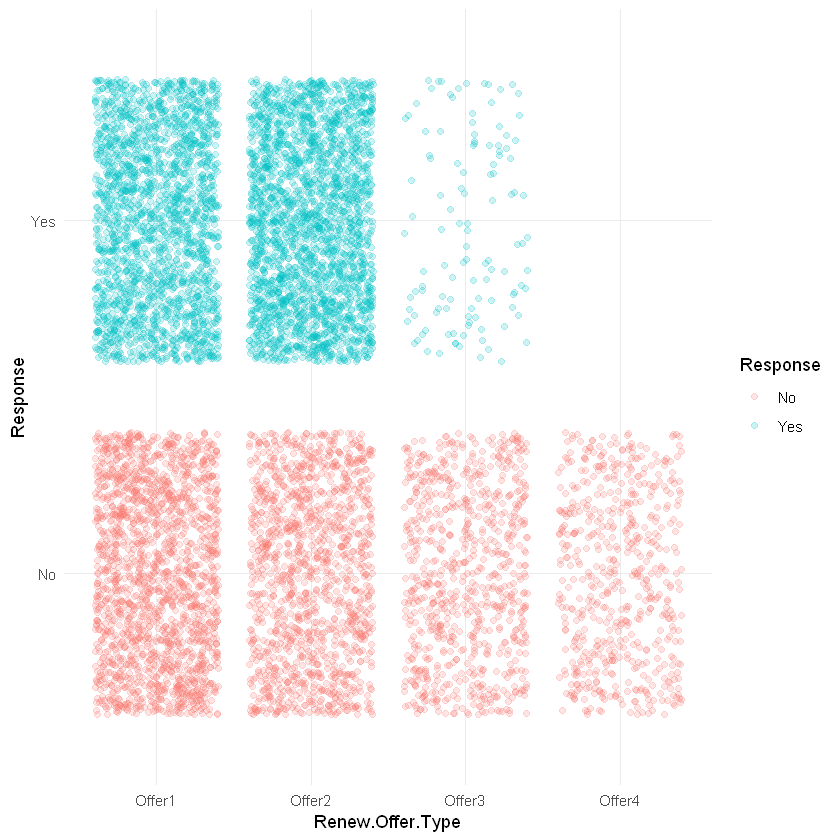

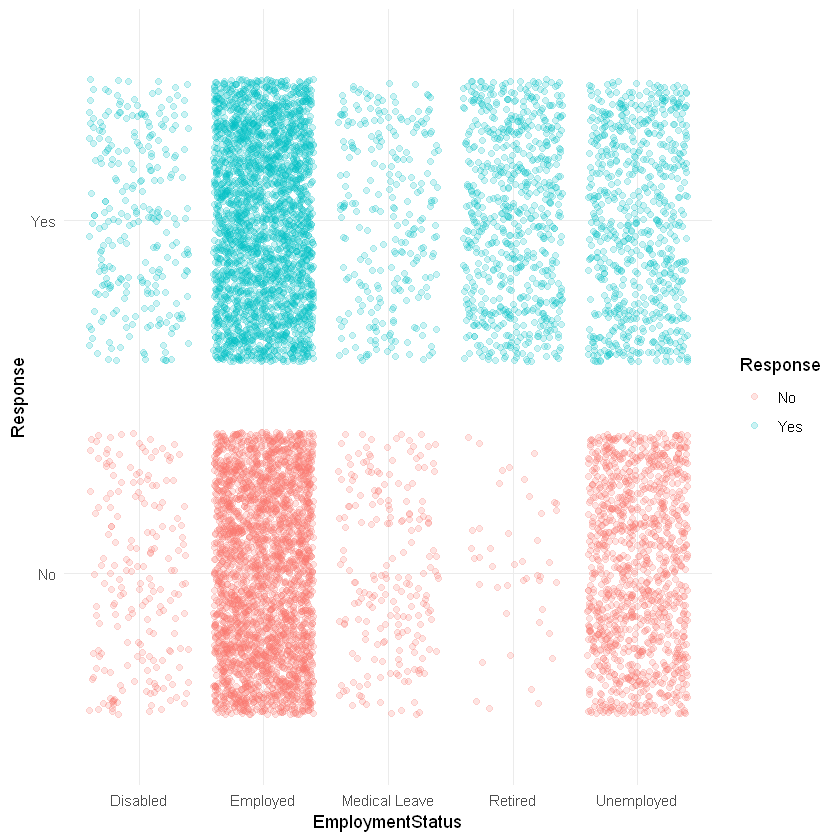

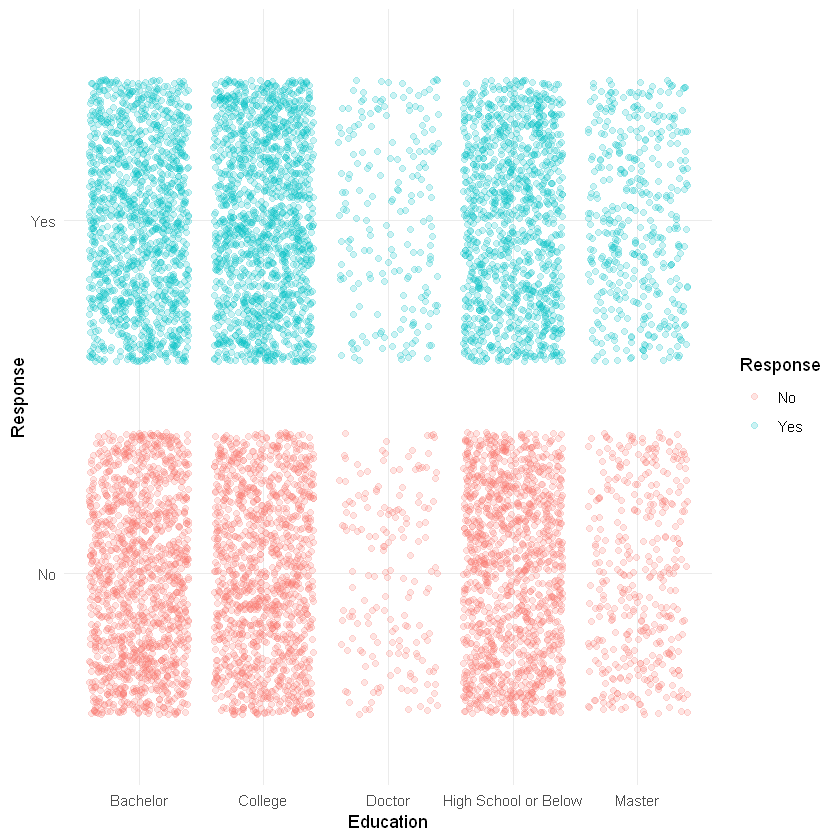

In [61]:
ggplot(data=ROSE_train_V1, aes(x=Renew.Offer.Type, y=Response)) + 
    geom_jitter(aes(color=Response), alpha = 0.2) +
    theme_minimal() 
ggplot(data=ROSE_train_V1, aes(x=EmploymentStatus, y=Response)) +
    geom_jitter(aes(color=Response), alpha = 0.2) +
    theme_minimal() 
ggplot(data=ROSE_train_V1, aes(x=Education, y=Response)) +
    geom_jitter(aes(color=Response), alpha = 0.2) +
    theme_minimal() 

<font color=blue>From the above, we can infer that...
1. Customers with renew offer 1 and 2 have a higher tendency to accept the insurance policy as compared to renew offer 3 and 4. 
2. Customers who are retired tend to accept the insurance policy more than other categories of employment status. 
3. Education is not as good of a predictor by its own. 

## [Back to top](#3.-Read-This-First) 

# 7. Key Takeaways

1. Single drivers are more likely to make a larger claim amount than married drivers. This also means that singles have a higher probability of getting into an accident.
2.  Total Claim Amount, months since policy inception and monthly premium are the top 3 factors when comparing across insurance profile variables. 
3. Renew Offer Type, Employment Status and Education are the top 3 factors when comparing across all variables.
4. Customers with renew offer 1 and 2 have a higher tendency to accept the insurance policy as compared to renew offer 3 and 4. 
5. Customers who are retired tend to accept the insurance policy more than other categories of employment status. 

# 8. Using R in Jupyter Notebook

https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/